# AlexNet Classification Cat Dog

### Libraries

In [15]:
from mat4py import loadmat
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import keras
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from sklearn.metrics import confusion_matrix, classification_report

### Import data

In [2]:
# Load data
data = loadmat('CatDog.mat')
data

{'X': [[-1.847107438016522,
   -43.84710743801652,
   -68.84710743801652,
   -17.847107438016522,
   116.15289256198348,
   -4.847107438016522,
   117.15289256198348,
   67.15289256198348,
   29.152892561983478,
   -74.84710743801652,
   1.152892561983478,
   -82.84710743801652,
   -100.84710743801652,
   -28.847107438016522,
   148.1528925619835,
   147.1528925619835,
   2.152892561983478,
   -39.84710743801652,
   30.152892561983478,
   -51.84710743801652,
   -70.84710743801652,
   -66.84710743801652,
   66.15289256198348,
   -3.847107438016522,
   8.152892561983478,
   -64.84710743801652,
   -53.84710743801652,
   -3.847107438016522,
   126.15289256198348,
   -101.84710743801652,
   -0.847107438016522,
   -97.84710743801652,
   88.15289256198348,
   -59.84710743801652,
   70.15289256198348,
   -83.84710743801652,
   -72.84710743801652,
   47.15289256198348,
   53.15289256198348,
   47.15289256198348,
   -50.84710743801652,
   -90.84710743801652,
   -8.847107438016522,
   148.1528925

### Exploration inside of data

In [3]:
# available in the loaded data
print(data.keys())

dict_keys(['X', 'G', 'nx', 'ny'])


In [4]:
X_length = len(data['X'])
print("length of X:", X_length)
G_length = len(data['G'])
print("length of G:", G_length)


length of X: 4096
length of G: 242


### Dataframe

In [5]:
# Create a DataFrame
df = pd.DataFrame(data['X'])

# Transpose the DataFrame to have sublists as columns
df = df.transpose()

# Assign labels to the DataFrame
df['Label'] = data['G']

df.head()

0          1           2           3           4           5  \
0   -1.847107   -6.18595  -16.677686  -17.227273  -29.694215  -69.826446   
1  -43.847107  -40.18595  -36.677686  -28.227273  -18.694215  -12.826446   
2  -68.847107  -52.18595    4.322314   56.772727   69.305785   65.173554   
3  -17.847107   -4.18595  -12.677686  -58.227273  -61.694215  -60.826446   
4  116.152893  118.81405  119.322314  123.772727  126.305785  123.173554   

            6           7           8           9  ...       4087       4088  \
0  -87.371901  -95.305785  -95.731405 -102.578512  ... -75.260331 -74.247934   
1   -8.371901   -2.305785   -1.731405   -1.578512  ... -26.260331 -17.247934   
2   63.628099   65.694215   72.268595   76.421488  ... -33.260331  -7.247934   
3  -58.371901  -56.305785  -65.731405  -59.578512  ...  77.739669  79.752066   
4  131.628099  126.694215  119.268595  121.421488  ...  59.739669  58.752066   

        4089       4090      4091       4092       4093       4094       4095  \
0 -74.173554 -52.446281 -29.31405 -29.747934 -54.409091 -67.702479 -75.607438   
1  -7.173554 -11.446281 -14.31405 -11.747934 -12.409091 -12.702479 -12.607438   
2  14.826446  36.553719  25.68595  26.252066  13.590909   2.297521 -11.607438   
3  75.826446  78.553719  77.68595  78.252066  80.590909  84.297521  83.392562   
4  64.826446  67.553719  65.68595  61.252066  60.590909  63.297521  58.392562   

   Label  
0      0  
1      0  
2      0  
3      0  
4      0  

[5 rows x 4097 columns]

### assigning the x train and y train

In [6]:
y = df["Label"]

# Drop 'label' column
X = df.drop("Label" ,axis = 1) 

### Plot of label

Label
0    121
1    121
Name: count, dtype: int64


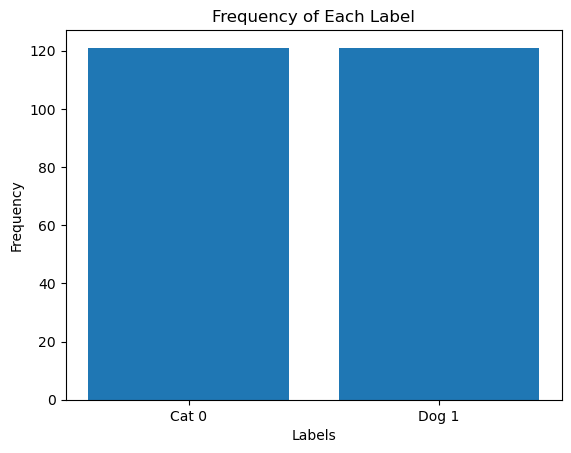

In [7]:
labels = ['Cat 0', 'Dog 1']
counts = y.value_counts()
print(y.value_counts())
plt.bar(labels, counts)
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.title('Frequency of Each Label')
plt.show()

### Missing values

In [8]:
X.isnull().any().sum()

0

In [9]:
y.isnull().any().sum()

0

### Label Encoding

In [10]:
# Convert labels to categorical
y = tf.keras.utils.to_categorical(y)

### Reshape

In [11]:
# Convert DataFrame to NumPy array
X_np = X.values
# Reshape the scaled data for CNN input
X = X_np.reshape(-1, 64, 64, 1)
X.shape

(242, 64, 64, 1)

### Normalization and resizing

In [12]:
# resizing
def resiz(images):
    # Normalize images to have a mean of 0 and standard deviation of 1
    images = tf.image.per_image_standardization(images)
    # Resize images from 64x64 to 227x227 for AlexNet
    images = tf.image.resize(images, (227, 227))
    return images

# resize X
X = np.array([resiz(image) for image in X])

### Showing some of the photos of cute cats

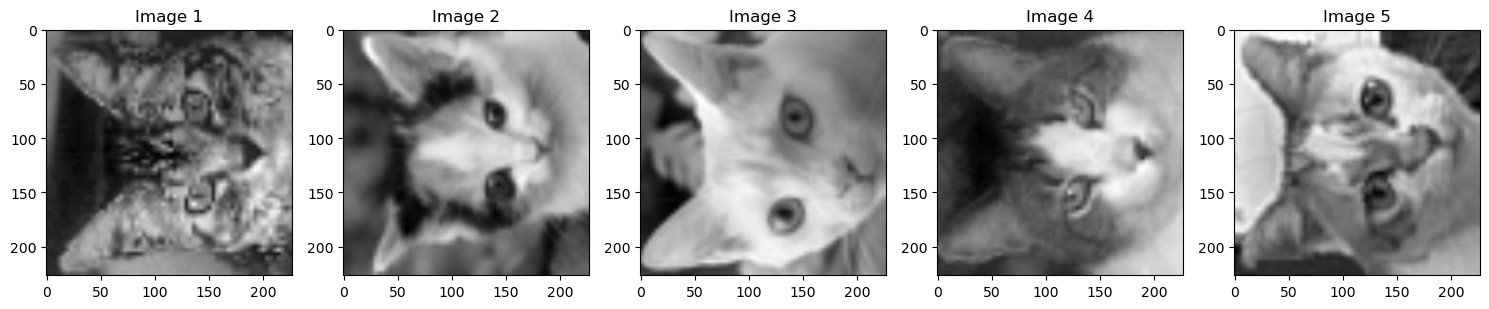

In [13]:
num_images_to_visualize = 5  # we can change this number if we want to see lesser or more pic

# showing the 5 first images
fig, axes = plt.subplots(1, num_images_to_visualize, figsize=(15, 3))  # we can change figsize

for i in range(num_images_to_visualize):
    axes[i].imshow(X[i], cmap='gray')  # the cmap='gray' is using for the grayscale
    axes[i].set_title(f"Image {i + 1}")

plt.tight_layout()
plt.show()


### AlexNet model

In [16]:
# AlexNet architecture
model = Sequential()

# Layer 1
model.add(Conv2D(filters=96, input_shape=(227, 227, 1), kernel_size=(11, 11), strides=(4, 4), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(BatchNormalization())

# Layer 2
model.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(BatchNormalization())

# Layer 3
model.add(Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))

# Layer 4
model.add(Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))

# Layer 5
model.add(Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(BatchNormalization())

# Flatten
model.add(Flatten())

# Fully connected layers with L2 regularization
model.add(Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)))  # Output layer for binary classification


# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Checking Model Summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 55, 55, 96)        11712     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 27, 27, 96)        0         
 g2D)                                                            
                                                                 
 batch_normalization_3 (Bat  (None, 27, 27, 96)        384       
 chNormalization)                                                
                                                                 
 conv2d_6 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 256)       0         
 g2D)                                                            
                                                     

### Showing the plot of our AlexNet architecture

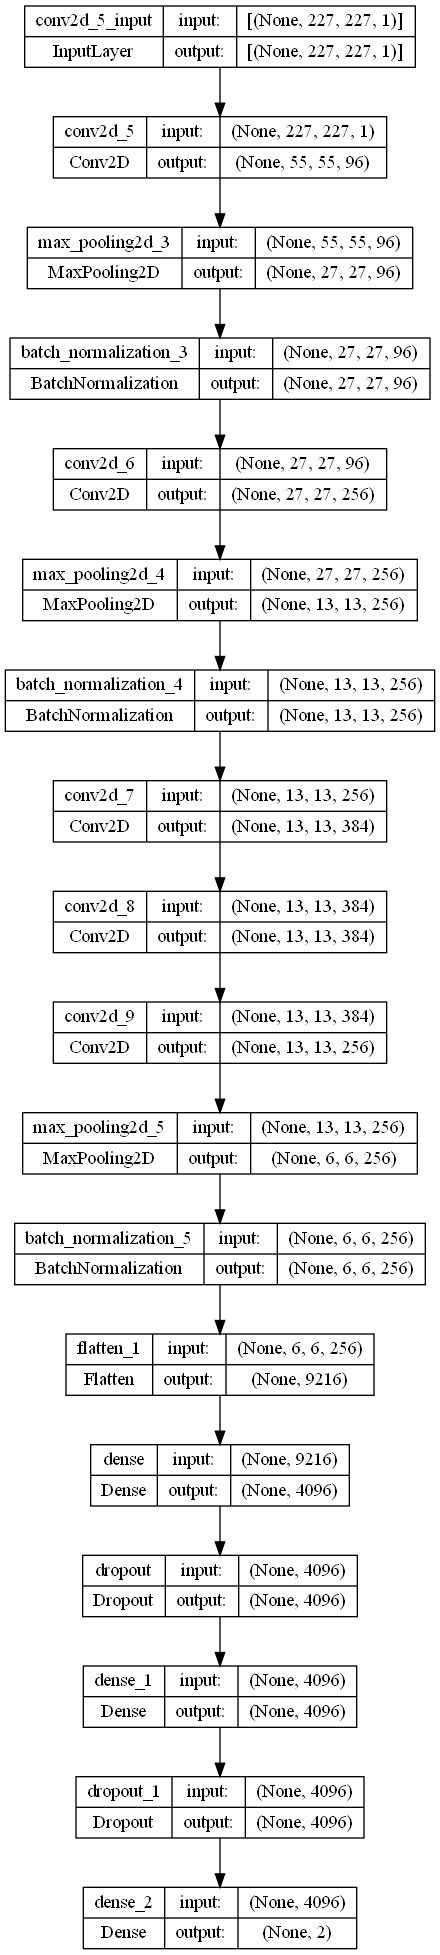

In [17]:
keras.utils.plot_model(model, to_file="my_model.png", show_shapes=True)

### Train Test Split - Train Validation Split

In [18]:
# first train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# then spliting our training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# showign our shapes of datasets
print("Train set shapes:", X_train.shape, y_train.shape)
print("Validation set shapes:", X_val.shape, y_val.shape)
print("Test set shapes:", X_test.shape, y_test.shape)

Train set shapes: (154, 227, 227, 1) (154, 2)
Validation set shapes: (39, 227, 227, 1) (39, 2)
Test set shapes: (49, 227, 227, 1) (49, 2)


In [19]:
batch_siz = 64

### Train the model

In [18]:
"""history1 = model.fit(
    X_train, y_train,
    batch_size=batch_siz,
    epochs=150,
    validation_data=(X_val, y_val),
    verbose=1
)"""

Epoch 1/150


3/3 [==============================] - 10s 2s/step - loss: 3.8481 - accuracy: 0.5519 - val_loss: 1.9612 - val_accuracy: 0.5641
Epoch 2/150
3/3 [==============================] - 6s 2s/step - loss: 3.0433 - accuracy: 0.7857 - val_loss: 8.4628 - val_accuracy: 0.5128
Epoch 3/150
3/3 [==============================] - 7s 2s/step - loss: 0.9093 - accuracy: 0.8636 - val_loss: 26.7155 - val_accuracy: 0.5128
Epoch 4/150
3/3 [==============================] - 7s 2s/step - loss: 1.0367 - accuracy: 0.8506 - val_loss: 7.4364 - val_accuracy: 0.8205
Epoch 5/150
3/3 [==============================] - 7s 2s/step - loss: 0.7770 - accuracy: 0.8896 - val_loss: 19.2177 - val_accuracy: 0.5897
Epoch 6/150
3/3 [==============================] - 7s 2s/step - loss: 0.0923 - accuracy: 0.9740 - val_loss: 44.2243 - val_accuracy: 0.5128
Epoch 7/150
3/3 [==============================] - 7s 2s/step - loss: 0.2780 - accuracy: 0.9481 - val_loss: 10.4412 - val_accuracy: 0.7179
Epoch 8/150
3/3 [==========

3/3 [==============================] - 7s 2s/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 13.1321 - val_accuracy: 0.8205
Epoch 57/150
3/3 [==============================] - 7s 2s/step - loss: 5.9283e-08 - accuracy: 1.0000 - val_loss: 12.5790 - val_accuracy: 0.8205
Epoch 58/150
3/3 [==============================] - 7s 2s/step - loss: 2.6615e-07 - accuracy: 1.0000 - val_loss: 12.1023 - val_accuracy: 0.7949
Epoch 59/150
3/3 [==============================] - 7s 2s/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 11.4178 - val_accuracy: 0.7949
Epoch 60/150
3/3 [==============================] - 7s 2s/step - loss: 6.0502e-08 - accuracy: 1.0000 - val_loss: 10.7413 - val_accuracy: 0.7949
Epoch 61/150
3/3 [==============================] - 7s 2s/step - loss: 5.2872e-08 - accuracy: 1.0000 - val_loss: 10.1349 - val_accuracy: 0.7949
Epoch 62/150
3/3 [==============================] - 7s 2s/step - loss: 4.0467e-08 - accuracy: 1.0000 - val_loss: 9.6221 - val_accuracy: 0.7949
Epoch 63/150
3

Epoch 114/150
3/3 [==============================] - 8s 3s/step - loss: 4.5492e-16 - accuracy: 1.0000 - val_loss: 7.7139 - val_accuracy: 0.8974
Epoch 115/150
3/3 [==============================] - 8s 2s/step - loss: 1.9951e-10 - accuracy: 1.0000 - val_loss: 7.5842 - val_accuracy: 0.8974
Epoch 116/150
3/3 [==============================] - 8s 2s/step - loss: 0.0278 - accuracy: 1.0000 - val_loss: 7.3587 - val_accuracy: 0.8974
Epoch 117/150
3/3 [==============================] - 8s 2s/step - loss: 1.0011e-09 - accuracy: 1.0000 - val_loss: 7.1096 - val_accuracy: 0.8974
Epoch 118/150
3/3 [==============================] - 8s 2s/step - loss: 0.0099 - accuracy: 1.0000 - val_loss: 6.9064 - val_accuracy: 0.8974
Epoch 119/150
3/3 [==============================] - 8s 2s/step - loss: 3.3525e-14 - accuracy: 1.0000 - val_loss: 6.7147 - val_accuracy: 0.8974
Epoch 120/150
3/3 [==============================] - 8s 3s/step - loss: 2.1821e-21 - accuracy: 1.0000 - val_loss: 6.6164 - val_accuracy: 0.8974


### Plot Of Training History 1

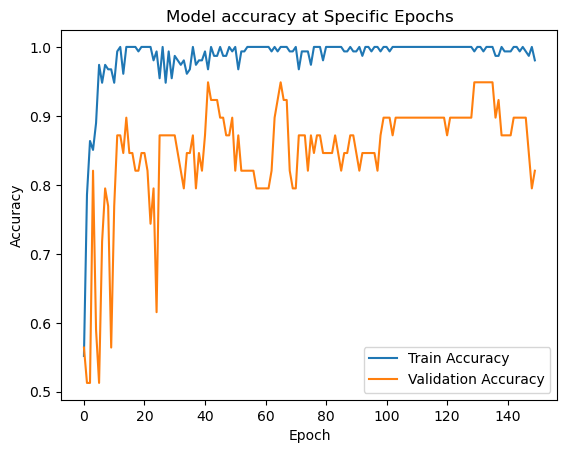

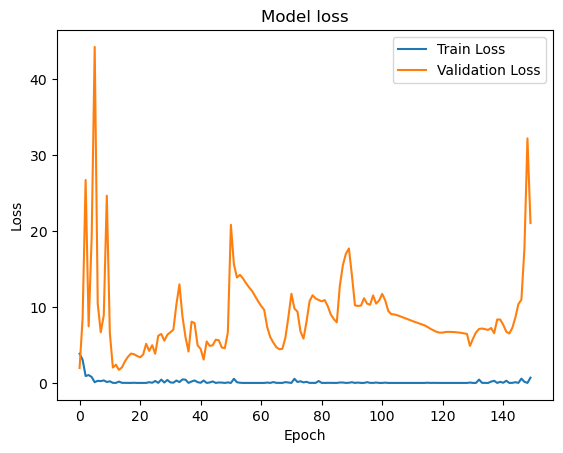

In [19]:
"""# Plot training & validation accuracy values at specific epochs
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model accuracy at Specific Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train Accuracy', 'Validation Accuracy'], loc='lower right')
plt.show()


# Plot training & validation loss values
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train Loss', 'Validation Loss'], loc='upper right')
plt.show()"""

### Data Augmentaion

In [20]:
datagen = ImageDataGenerator(
    rotation_range=40,      # Randomly rotate images
    width_shift_range=0.2,  # Randomly shift images horizontally by 20%
    height_shift_range=0.2, # Randomly shift images vertically by 20%
    shear_range=0.2,        # Shear transformations
    zoom_range=0.2,         # Randomly zoom images by 20%
    horizontal_flip=True,   # Randomly flip images horizontally
    fill_mode='nearest'     # Fill in newly created pixels after rotation or shifting
)

# Fit the ImageDataGenerator on our training data
datagen.fit(X_train)

### Early Stop

In [21]:
# EarlyStopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

### Train model after using Augmentaion and early stop

In [22]:
train_generator = datagen.flow(X_train, y_train, batch_size=batch_siz)

# Use train_generator in model.fit() instead of X_train and y_train
history2 = model.fit(
    train_generator,
    epochs=100,
    validation_data=(X_val, y_val),
    verbose=1,
    callbacks=[early_stop]
)

Epoch 1/100


3/3 [==============================] - 11s 3s/step - loss: 103.3659 - accuracy: 0.4416 - val_loss: 94.1475 - val_accuracy: 0.4872
Epoch 2/100
3/3 [==============================] - 7s 3s/step - loss: 89.7981 - accuracy: 0.4481 - val_loss: 106.3484 - val_accuracy: 0.4872
Epoch 3/100
3/3 [==============================] - 7s 3s/step - loss: 81.3299 - accuracy: 0.5130 - val_loss: 114.2084 - val_accuracy: 0.4872
Epoch 4/100
3/3 [==============================] - 8s 2s/step - loss: 73.9185 - accuracy: 0.5260 - val_loss: 81.6736 - val_accuracy: 0.4872
Epoch 5/100
3/3 [==============================] - 8s 2s/step - loss: 66.6763 - accuracy: 0.5779 - val_loss: 63.5430 - val_accuracy: 0.4872
Epoch 6/100
3/3 [==============================] - 8s 3s/step - loss: 57.6828 - accuracy: 0.5519 - val_loss: 56.3555 - val_accuracy: 0.5128
Epoch 7/100
3/3 [==============================] - 8s 2s/step - loss: 51.7724 - accuracy: 0.5649 - val_loss: 49.3512 - val_accuracy: 0.5128
Epoch 8/100
3/

3/3 [==============================] - 8s 2s/step - loss: 0.9457 - accuracy: 0.7662 - val_loss: 0.7795 - val_accuracy: 0.8462
Epoch 57/100
3/3 [==============================] - 8s 2s/step - loss: 0.9741 - accuracy: 0.7922 - val_loss: 0.7895 - val_accuracy: 0.8462
Epoch 58/100
3/3 [==============================] - 8s 2s/step - loss: 0.8924 - accuracy: 0.7987 - val_loss: 0.8822 - val_accuracy: 0.7949
Epoch 59/100
3/3 [==============================] - 8s 2s/step - loss: 0.8735 - accuracy: 0.7857 - val_loss: 1.0778 - val_accuracy: 0.7436
Epoch 60/100
3/3 [==============================] - 8s 3s/step - loss: 0.9085 - accuracy: 0.7792 - val_loss: 0.8659 - val_accuracy: 0.7949


### Plot Training History 2

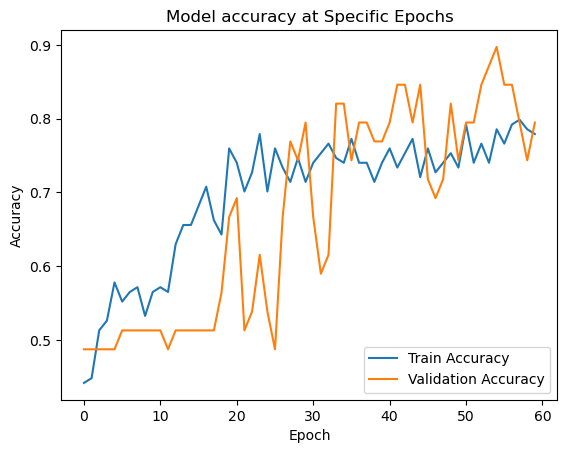

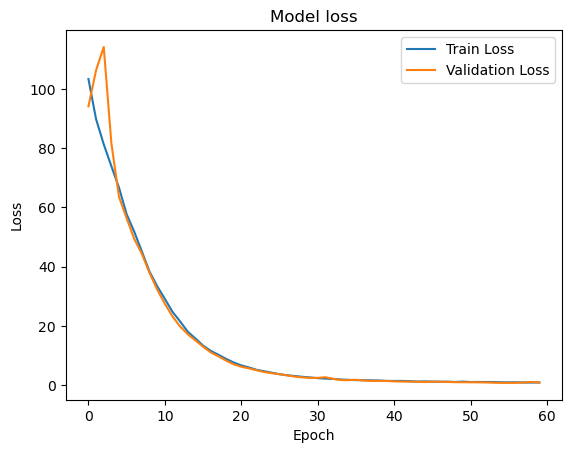

In [23]:
# Plot training & validation accuracy values at specific epochs
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model accuracy at Specific Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train Accuracy', 'Validation Accuracy'], loc='lower right')
plt.show()


# Plot training & validation loss values
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train Loss', 'Validation Loss'], loc='upper right')
plt.show()

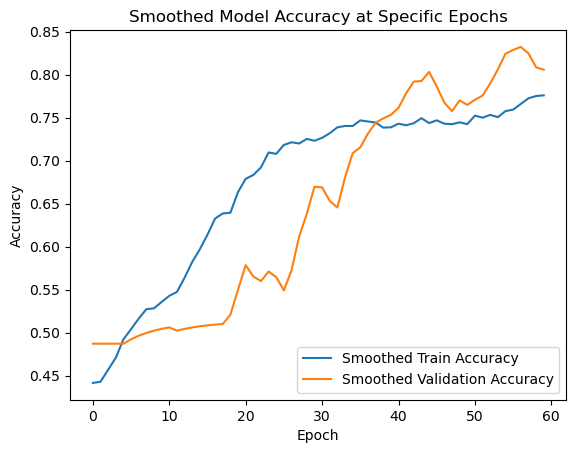

In [24]:
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

# Smooth training accuracy
smoothed_train_accuracy = smooth_curve(history2.history['accuracy'])

# Smooth validation accuracy
smoothed_val_accuracy = smooth_curve(history2.history['val_accuracy'])

# Plot smoothed accuracy
plt.plot(smoothed_train_accuracy)
plt.plot(smoothed_val_accuracy)
plt.title('Smoothed Model Accuracy at Specific Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Smoothed Train Accuracy', 'Smoothed Validation Accuracy'], loc='lower right')
plt.show()


### Evaluation

In [25]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}, Test loss: {test_loss}")


2/2 [==============================] - 1s 201ms/step - loss: 0.8071 - accuracy: 0.9184
Test accuracy: 0.918367326259613, Test loss: 0.8071228265762329


### Prediction

In [38]:
# Make predictions on the test set
predictions = model.predict(X_test)
print(predictions)

2/2 [==============================] - 0s 187ms/step
[[0.7696249  0.23946296]
 [0.81755126 0.17504415]
 [0.8224598  0.18719731]
 [0.07145507 0.9256463 ]
 [0.3849843  0.6232641 ]
 [0.32201794 0.68254834]
 [0.4845286  0.5194344 ]
 [0.4168779  0.57682854]
 [0.5369266  0.45986447]
 [0.5964788  0.4081737 ]
 [0.9825737  0.01791256]
 [0.201308   0.80233794]
 [0.01770847 0.9827886 ]
 [0.19493791 0.80593556]
 [0.91900253 0.07818808]
 [0.47491974 0.53322035]
 [0.61509234 0.38882396]
 [0.8625499  0.13204062]
 [0.8599855  0.12356783]
 [0.14800183 0.8520319 ]
 [0.15326798 0.8491898 ]
 [0.837607   0.15204607]
 [0.78630793 0.19984001]
 [0.71318674 0.29657334]
 [0.02839941 0.97112006]
 [0.45880413 0.5516716 ]
 [0.9909302  0.00773488]
 [0.5621402  0.43347046]
 [0.67219025 0.32669276]
 [0.05680478 0.9436095 ]
 [0.9934526  0.00676375]
 [0.01026732 0.9903928 ]
 [0.9090124  0.08520443]
 [0.91247016 0.08413424]
 [0.98950773 0.00979793]
 [0.12634061 0.8729011 ]
 [0.9355348  0.06040509]
 [0.06117454 0.9381637

In [39]:
# threshold
threshold = 0.5

# Convert probabilities to class predictions based on the threshold
if predictions.ndim > 1 and predictions.shape[1] > 1:
    predicted_labels = np.argmax(predictions, axis=1)
    predicted_labels = np.where(predicted_labels == 1, 'Dog', 'Cat')
else:
    predicted_labels = np.where(predictions > threshold, 'Dog', 'Cat')

print(predicted_labels)

['Cat' 'Cat' 'Cat' 'Dog' 'Dog' 'Dog' 'Dog' 'Dog' 'Cat' 'Cat' 'Cat' 'Dog'
 'Dog' 'Dog' 'Cat' 'Dog' 'Cat' 'Cat' 'Cat' 'Dog' 'Dog' 'Cat' 'Cat' 'Cat'
 'Dog' 'Dog' 'Cat' 'Cat' 'Cat' 'Dog' 'Cat' 'Dog' 'Cat' 'Cat' 'Cat' 'Dog'
 'Cat' 'Dog' 'Dog' 'Dog' 'Cat' 'Cat' 'Cat' 'Dog' 'Dog' 'Cat' 'Dog' 'Cat'
 'Dog']


### Confusion Matrix

In [29]:
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# classification report
classification_rep = classification_report(true_labels, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


Confusion Matrix:
[[24  2]
 [ 2 21]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        26
           1       0.91      0.91      0.91        23

    accuracy                           0.92        49
   macro avg       0.92      0.92      0.92        49
weighted avg       0.92      0.92      0.92        49

